In [7]:
from ray import tune, air
from ray.tune.examples.mnist_pytorch import train_mnist
from ray.tune import ResultGrid

local_dir = "/tmp/ray_results"
exp_name = "tune_analyzing_results"
tuner = tune.Tuner(
    train_mnist,
    param_space={
        "lr": tune.loguniform(0.001, 0.1),
        "momentum": tune.grid_search([0.8, 0.9, 0.99]),
        "should_checkpoint": True,
    },
    run_config=air.RunConfig(
        name=exp_name,
        stop={"training_iteration": 15},
        checkpoint_config=air.CheckpointConfig(
            checkpoint_score_attribute="mean_accuracy",
            num_to_keep=5,
        ),
        local_dir=local_dir,
    ),
    tune_config=tune.TuneConfig(mode="max", metric="mean_accuracy", num_samples=3),
)
result_grid: ResultGrid = tuner.fit()

run time is 1


Trial name,date,done,episodes_total,experiment_id,hostname,iterations_since_restore,mean_accuracy,node_ip,pid,should_checkpoint,time_since_restore,time_this_iter_s,time_total_s,timestamp,timesteps_since_restore,timesteps_total,training_iteration,trial_id,warmup_time
train_mnist_eba0a_00000,2023-03-28_13-53-58,False,,ef2b2ee5c03f48ca9061c35e78086e3a,tianjiandiannao,1,0.09375,127.0.0.1,97785,True,0.465124,0.465124,0.465124,1679982838,0,,1,eba0a_00000,0.00215125


run time is 2
run time is 3
run time is 4
run time is 5
run time is 6
run time is 7
run time is 8
run time is 9
run time is 10
run time is 1
run time is 1
run time is 1
run time is 1
run time is 1
run time is 2
run time is 1
run time is 2
run time is 2
run time is 2
run time is 11
run time is 2
run time is 1
run time is 3
run time is 2
run time is 3
run time is 3
run time is 3
run time is 12
run time is 2
run time is 3
run time is 3
run time is 4
run time is 4
run time is 4
run time is 13
run time is 4
run time is 4
run time is 3
run time is 5
run time is 4
run time is 5
run time is 14
run time is 5
run time is 5
run time is 5
run time is 4
run time is 6
run time is 5
run time is 6
run time is 15
run time is 6
run time is 6
run time is 5
run time is 6
run time is 6
run time is 7
run time is 7
run time is 7
run time is 1
run time is 6
run time is 7
run time is 8
run time is 7
run time is 7
run time is 2
run time is 8
run time is 8
run time is 8
run time is 7
run time is 8
run time is 9


2023-03-28 13:54:05,388	INFO tune.py:798 -- Total run time: 12.01 seconds (12.00 seconds for the tuning loop).


run time is 1


Trial name,date,done,episodes_total,experiment_id,hostname,iterations_since_restore,mean_accuracy,node_ip,pid,should_checkpoint,time_since_restore,time_this_iter_s,time_total_s,timestamp,timesteps_since_restore,timesteps_total,training_iteration,trial_id,warmup_time
train_mnist_f2cc3_00000,2023-03-28_13-54-09,False,,3213ac86c3424eef9ad643bee99c3fd9,tianjiandiannao,1,0.13125,127.0.0.1,97808,True,0.205292,0.205292,0.205292,1679982849,0,,1,f2cc3_00000,0.00268197


run time is 2
run time is 3
run time is 4
run time is 5
run time is 6
run time is 7
run time is 8
run time is 9
run time is 10
run time is 1
run time is 1
run time is 1
run time is 1
run time is 2
run time is 11
run time is 1
run time is 2
run time is 2
run time is 2
run time is 1
run time is 1
run time is 12
run time is 2
run time is 3
run time is 3
run time is 3
run time is 3
run time is 2
run time is 2
run time is 3
run time is 13
run time is 4
run time is 4
run time is 4
run time is 4
run time is 3
run time is 3
run time is 14
run time is 5
run time is 5
run time is 5
run time is 4
run time is 5
run time is 4
run time is 4
run time is 6
run time is 5
run time is 15
run time is 6
run time is 6
run time is 6
run time is 5
run time is 5
run time is 7
run time is 6
run time is 1
run time is 7
run time is 6
run time is 7
run time is 7
run time is 7
run time is 2
run time is 8
run time is 8
run time is 7
run time is 8
run time is 6
run time is 3
run time is 8
run time is 9
run time is 8


2023-03-28 13:54:17,207	INFO tune.py:798 -- Total run time: 11.80 seconds (11.79 seconds for the tuning loop).


In [8]:
result_grid.get_best_result()

Result(metrics={'mean_accuracy': 0.940625, 'should_checkpoint': True, 'done': True, 'trial_id': 'f2cc3_00004', 'experiment_tag': '4_lr=0.0602,momentum=0.9000'}, error=None, log_dir=PosixPath('/tmp/ray_results/tune_analyzing_results/train_mnist_f2cc3_00004_4_lr=0.0602,momentum=0.9000_2023-03-28_13-54-09'))

In [9]:
# Iterate over results
for i, result in enumerate(result_grid):
    if result.error:
        print(f"Trial #{i} had an error:", result.error)
        continue

    print(
        f"Trial #{i} finished successfully with a mean accuracy metric of:",
        result.metrics["mean_accuracy"])

Trial #0 finished successfully with a mean accuracy metric of: 0.778125
Trial #1 finished successfully with a mean accuracy metric of: 0.934375
Trial #2 finished successfully with a mean accuracy metric of: 0.790625
Trial #3 finished successfully with a mean accuracy metric of: 0.890625
Trial #4 finished successfully with a mean accuracy metric of: 0.940625
Trial #5 finished successfully with a mean accuracy metric of: 0.778125
Trial #6 finished successfully with a mean accuracy metric of: 0.9
Trial #7 finished successfully with a mean accuracy metric of: 0.921875
Trial #8 finished successfully with a mean accuracy metric of: 0.825


Text(0, 0.5, 'Mean Test Accuracy')

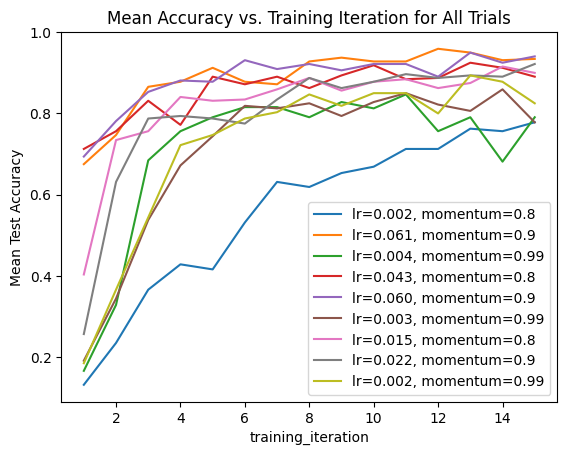

In [10]:
ax = None
for result in result_grid:
    label = f"lr={result.config['lr']:.3f}, momentum={result.config['momentum']}"
    if ax is None:
        ax = result.metrics_dataframe.plot("training_iteration", "mean_accuracy", label=label)
    else:
        result.metrics_dataframe.plot("training_iteration", "mean_accuracy", ax=ax, label=label)
ax.set_title("Mean Accuracy vs. Training Iteration for All Trials")
ax.set_ylabel("Mean Test Accuracy")

# Best Result

In [ ]:
from ray.air import Result

# Get the result with the maximum test set `mean_accuracy`
best_result: Result = result_grid.get_best_result()

# Get the result with the minimum `mean_accuracy`
worst_performing_result: Result = result_grid.get_best_result(
    metric="mean_accuracy", mode="min"
)

In [10]:
best_result

Result(metrics={'mean_accuracy': 0.971875, 'should_checkpoint': True, 'done': True, 'trial_id': '3ed97_00001', 'experiment_tag': '1_lr=0.0359,momentum=0.9000'}, error=None, log_dir=PosixPath('/tmp/ray_results/tune_analyzing_results/train_mnist_3ed97_00001_1_lr=0.0359,momentum=0.9000_2023-03-15_16-13-21'))

In [11]:
best_result.log_dir


PosixPath('/tmp/ray_results/tune_analyzing_results/train_mnist_3ed97_00001_1_lr=0.0359,momentum=0.9000_2023-03-15_16-13-21')

In [12]:
best_result.metrics


{'mean_accuracy': 0.971875,
 'time_this_iter_s': 0.09082818031311035,
 'should_checkpoint': True,
 'done': True,
 'timesteps_total': None,
 'episodes_total': None,
 'training_iteration': 100,
 'trial_id': '3ed97_00001',
 'experiment_id': '1834daca08214e19a4679dfc8c9bcdac',
 'date': '2023-03-15_16-13-37',
 'timestamp': 1678868017,
 'time_total_s': 11.562765121459961,
 'pid': 17261,
 'hostname': 'tianjiandiannao',
 'node_ip': '127.0.0.1',
 'config': {'lr': 0.03592233161351727,
  'momentum': 0.9,
  'should_checkpoint': True},
 'time_since_restore': 11.562765121459961,
 'timesteps_since_restore': 0,
 'iterations_since_restore': 100,
 'warmup_time': 0.002173185348510742,
 'experiment_tag': '1_lr=0.0359,momentum=0.9000'}

<Axes: xlabel='training_iteration'>

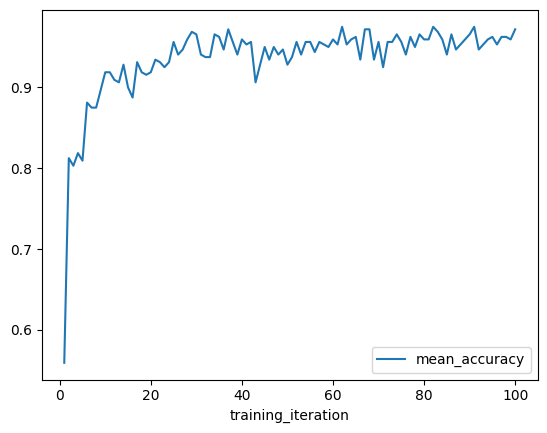

In [13]:
best_result.metrics_dataframe.plot("training_iteration", "mean_accuracy")


In [17]:
result_grid.get_dataframe()[["mean_accuracy","time_this_iter_s","config/lr","config/momentum"]]

,mean_accuracy,time_this_iter_s,config/lr,config/momentum
0,0.928125,0.102859,0.002341,0.80
1,0.971875,0.090828,0.035922,0.90
2,0.131250,0.080959,0.053796,0.99
3,0.918750,0.076792,0.013241,0.80
4,0.971875,0.077426,0.038330,0.90
5,0.931250,0.105879,0.001061,0.99
6,0.953125,0.084571,0.097415,0.80
7,0.925000,0.106099,0.004939,0.90
8,0.859375,0.078758,0.023509,0.99
